In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import math
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [0]:
#LOAD IMAGE DATASET
terinfeksi_data = os.listdir('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi/')
print(terinfeksi_data[:3])

print('\n')
tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi/')
print(tidakTerinfeksi_data[:3])

['C33P1thinF_IMG_20150619_114756a_cell_182.png', 'C33P1thinF_IMG_20150619_114756a_cell_179.png', 'C33P1thinF_IMG_20150619_114756a_cell_180.png']


['C1_thinF_IMG_20150604_104722_cell_15.png', 'C1_thinF_IMG_20150604_104722_cell_9.png', 'C1_thinF_IMG_20150604_104722_cell_79.png']


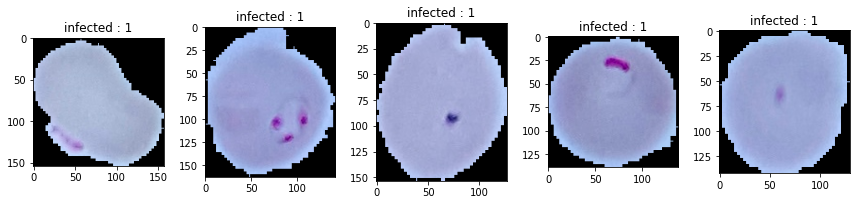

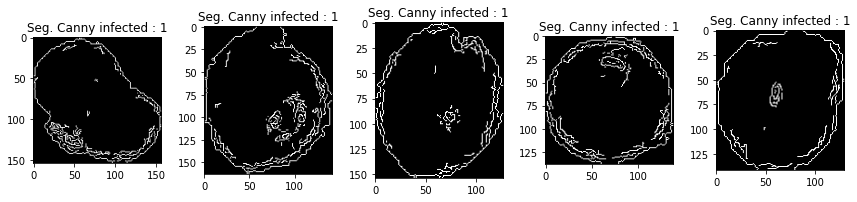

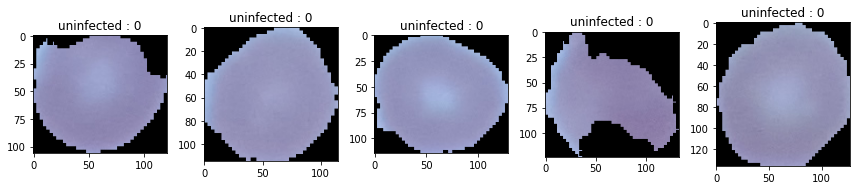

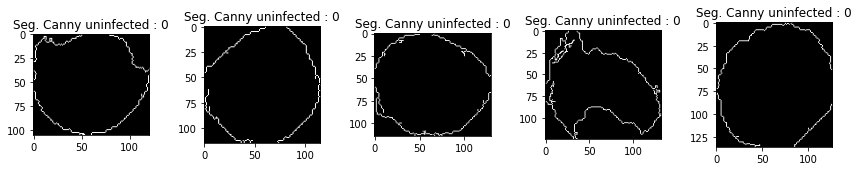

In [0]:
#VISUALISASI
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

In [0]:
#SEGMENTASI DAN HUMOMENT
x = np.array([['h1','h2','h3','h4','h5','h6','h7','target']])
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))


In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/dataset/malariax.csv", x, fmt='%s',delimiter=',' )

In [0]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/dataset/malariax.csv')
print (len(dataset))
print (dataset)

1000
           h1        h2            h3  ...            h6            h7  target
0    0.023963  0.000003  1.235240e-06  ... -1.021924e-09  3.040522e-14     1.0
1    0.016345  0.000002  6.049037e-08  ...  5.659561e-11  4.926718e-14     1.0
2    0.028576  0.000040  9.709428e-09  ...  2.584628e-10 -8.364369e-16     1.0
3    0.026203  0.000008  4.487093e-07  ...  6.891313e-10  9.782182e-14     1.0
4    0.031878  0.000007  3.233243e-08  ... -2.092504e-10 -7.165870e-15     1.0
..        ...       ...           ...  ...           ...           ...     ...
995  0.030485  0.000005  1.279365e-07  ...  2.110881e-10 -3.651114e-14     0.0
996  0.028462  0.000050  4.774869e-07  ...  1.094316e-09 -3.143415e-14     0.0
997  0.026030  0.000027  1.201002e-07  ...  3.384707e-10 -9.987108e-15     0.0
998  0.030782  0.000250  1.039153e-06  ...  4.740689e-08 -1.238891e-12     0.0
999  0.030859  0.000072  9.693204e-07  ... -7.226727e-11 -4.662779e-14     0.0

[1000 rows x 8 columns]


In [0]:
#replace NaN
zero_not_accepted = [ 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7' ]

for colum in zero_not_accepted:
   # dataset [colum] = dataset[colum].replace(0, np.NaN)
    mean = int(dataset[colum].mean(skipna=True))
    dataset[colum] = dataset[colum].replace(np.NaN, mean)

In [0]:
#split target and attribute
x = dataset.iloc[:,1:7]
y = dataset.iloc[:,7]

#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)
print(len(y_test))
print(len(x_train))
print(len(dataset))
y

100
900
1000


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: target, Length: 1000, dtype: float64

Text(0.5, 1.0, 'testing')

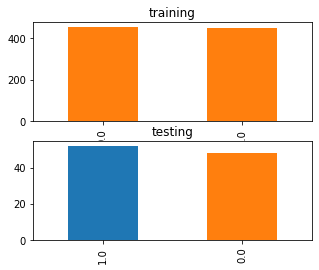

In [0]:
x_train
x_test
y_train
len(y_test)

plt.figure(figsize=(5,4))
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C1','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')

In [0]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_train

array([[ 0.2114    , -0.41337   , -0.34938148,  0.02854556, -0.50223129,
         0.05037525],
       [-0.27249125, -0.62691013, -0.64733793,  0.04074849, -0.36112402,
        -0.03381476],
       [-0.38047719, -0.31661629,  0.96035021,  0.14611456,  0.45820982,
         0.77333078],
       ...,
       [ 0.63289699,  0.31361108, -0.56622477,  0.0481398 , -0.46398238,
         0.02625007],
       [ 0.78026587, -0.02984823, -0.71689788,  0.04836448, -0.3653237 ,
        -0.02603088],
       [ 1.11930282, -0.61004417,  1.05535081,  0.31307929,  1.70171074,
         0.12633613]])

In [0]:
math.sqrt(len(y_test))

10.0

In [0]:
#choose method and fitting
classifier = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
#testing fsts
y_pred = classifier.predict(x_test)
y_pred

array([0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.])

In [0]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[26 22]
 [17 35]]
Akurasi : 0.61
presisi : [0.60465116 0.61403509]
recall : [0.54166667 0.67307692]
F-Measure : [0.57142857 0.64220183]


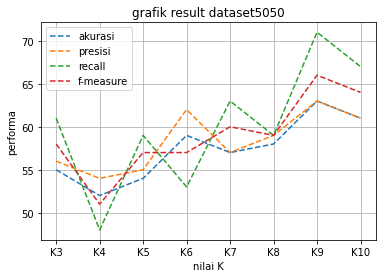

In [0]:
#dataset5050
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7", "K8","K9","K10"]
a = [55, 52, 54, 59, 57, 58 , 63 ,61]
p = [56, 54, 55, 62, 57, 59, 63, 61]
r = [61, 48, 59, 53, 63, 59, 71, 67]
f = [58, 51, 57, 57, 60, 59, 66, 64]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset5050")
plt.xlabel("nilai K")
plt.ylabel("performa")
plt.legend(["akurasi", "presisi", "recall", "f-measure"])
plt.grid()
plt.show()